In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv(r"D:\materials\course AI&ML track\materials\final_project_course_folder\fraud_data.csv")

# DATA EXPLORATION

Used pandas to read the dataset fraudTrain.csv.

Explored the shape and structure with df.info() and df.head().

Check for missing values

Used isnull().sum() to detect nulls.

Found that the data is almost clean.

Class imbalance analysis

Visualized the distribution of the target column is_fraud.

Detected a major class imbalance (fraud is very rare).

Explore important features

Checked features like category, amt, age, city_pop, and job.

Used histograms and countplots to see their relation to fraud.



In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


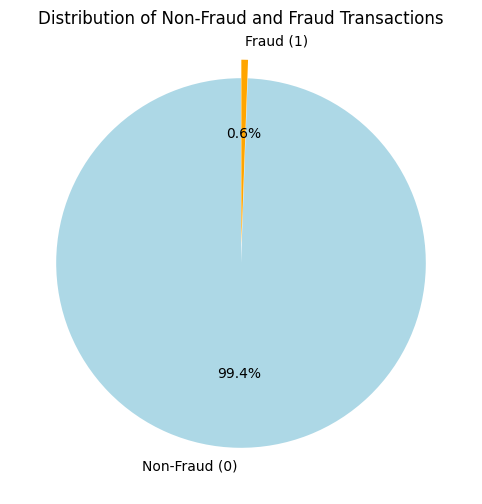

In [7]:
plt.figure(figsize=(10,6))
plt.pie(df['is_fraud'].value_counts(), labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'], explode=(0, 0.1))
plt.title('Distribution of Non-Fraud and Fraud Transactions')
plt.show()

In [8]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [9]:
df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [10]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [11]:
df['city'].unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [12]:
df.describe().round(2)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00
mean,648337.00,4.171920e+17,70.35,48800.67,38.54,-90.23,88824.44,1.349244e+09,38.54,-90.23,0.01
std,374317.97,1.308806e+18,160.32,26893.22,5.08,13.76,301956.36,1.284128e+07,5.11,13.77,0.08
min,0.00,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,324168.50,1.800429e+14,9.65,26237.00,34.62,-96.80,743.00,1.338751e+09,34.73,-96.90,0.00
50%,648337.00,3.521417e+15,47.52,48174.00,39.35,-87.48,2456.00,1.349250e+09,39.37,-87.44,0.00
75%,972505.50,4.642255e+15,83.14,72042.00,41.94,-80.16,20328.00,1.359385e+09,41.96,-80.24,0.00
max,1296674.00,4.992346e+18,28948.90,99783.00,66.69,-67.95,2906700.00,1.371817e+09,67.51,-66.95,1.00


<Axes: >

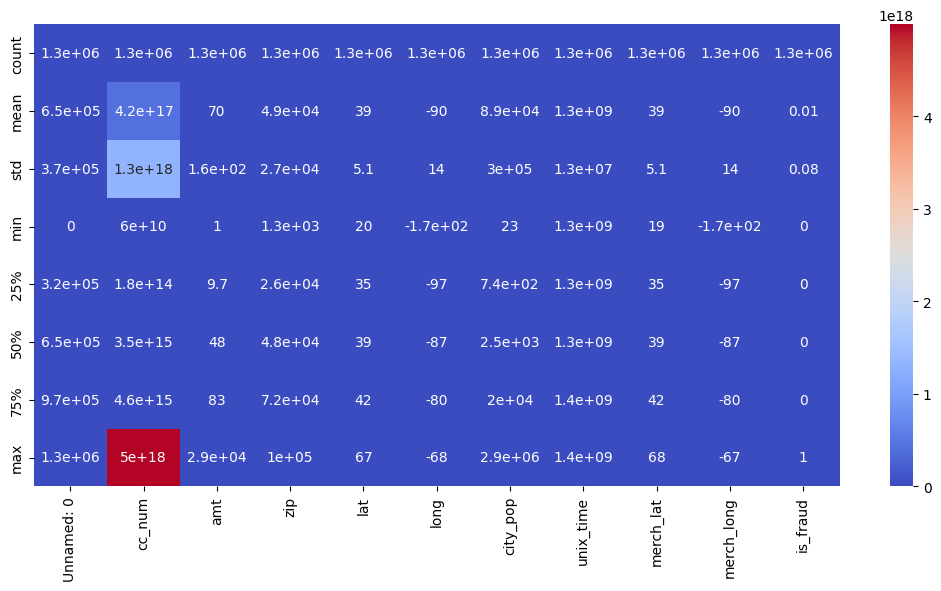

In [13]:
plt.figure(figsize=(13,6))
sns.heatmap(df.describe().round(2), annot=True, cmap='coolwarm')

<Axes: >

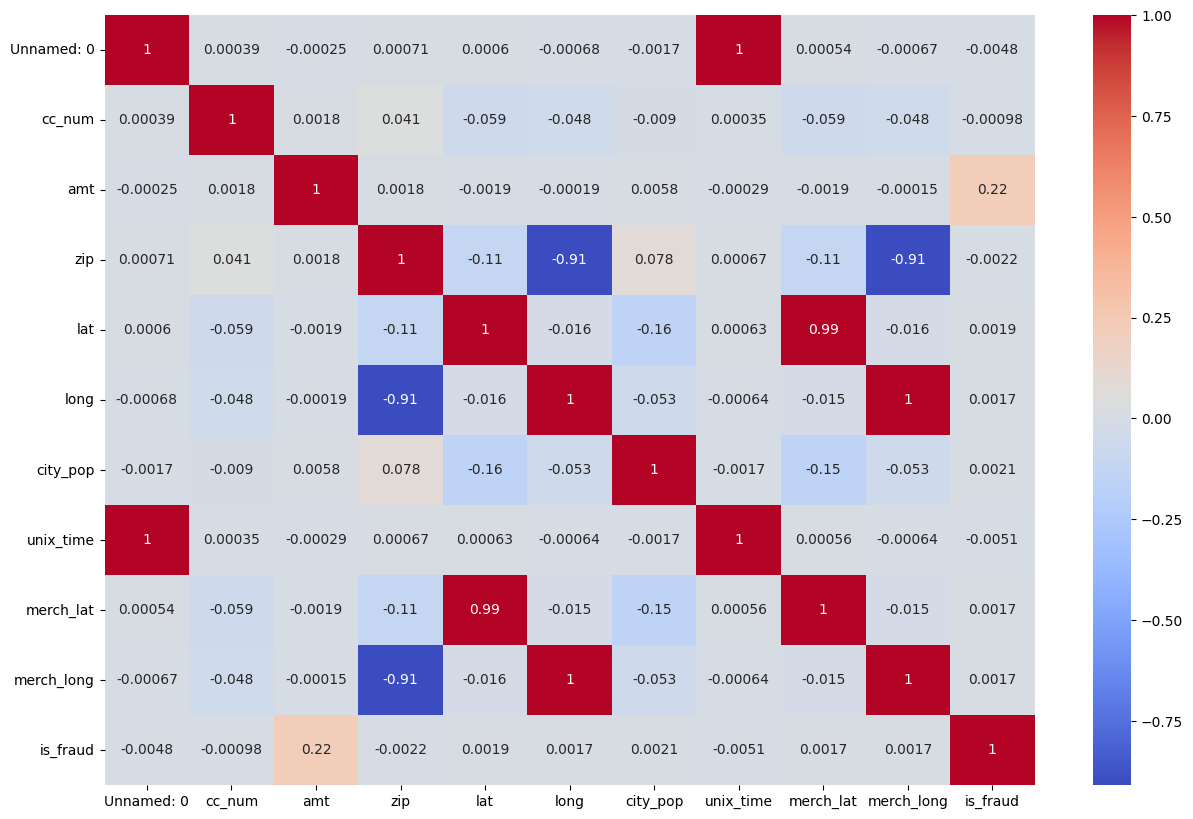

In [14]:
columns_corr=df.select_dtypes(include='number').columns
plt.figure(figsize=(15,10))
sns.heatmap(df[columns_corr].corr(), annot=True, cmap='coolwarm')

# DATA WRANGLING

Convert date to datetime format

Transformed trans_date_trans_time using pd.to_datetime().

Extract new features from date

Created new columns: hour, day, month, dayofweek.

Group ages into categories

Created an age_group column: young, adult, senior.

Drop or rename unnecessary columns

Removed unneeded columns like cc_num, job, etc.



In [15]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'], errors='coerce', format='mixed')
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

In [16]:
df['lat_diff']=abs(df['lat']-df['merch_lat'])
df['long_diff']=abs(df['long']-df['merch_long'])
df['dis_to_merch']=(df['lat_diff']**2+df['long_diff']**2)**0.5

In [17]:
cols_to_drop = [
    'first',
    'last',
    'lat',
    'long',
   'merch_lat',
    'merch_long',
    'lat_diff',
    'long_diff',
    'street',
    'zip',
    'trans_num',
    'unix_time',
    'dob'
]
df.drop(columns=cols_to_drop, inplace=True)

In [18]:
df=df[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'gender', 'city', 'state', 'city_pop', 'job', 'age','dis_to_merch',  'is_fraud']]

In [19]:
df['trans_date_trans_time'].dtype

dtype('<M8[ns]')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   city                   1296675 non-null  object        
 7   state                  1296675 non-null  object        
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  age                    1296675 non-null  int32         
 11  dis_to_merch           1296675 non-null  float64       
 12  is_fraud               12966

In [21]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
city_pop                 0
job                      0
age                      0
dis_to_merch             0
is_fraud                 0
dtype: int64

In [22]:
df.duplicated().sum()

0

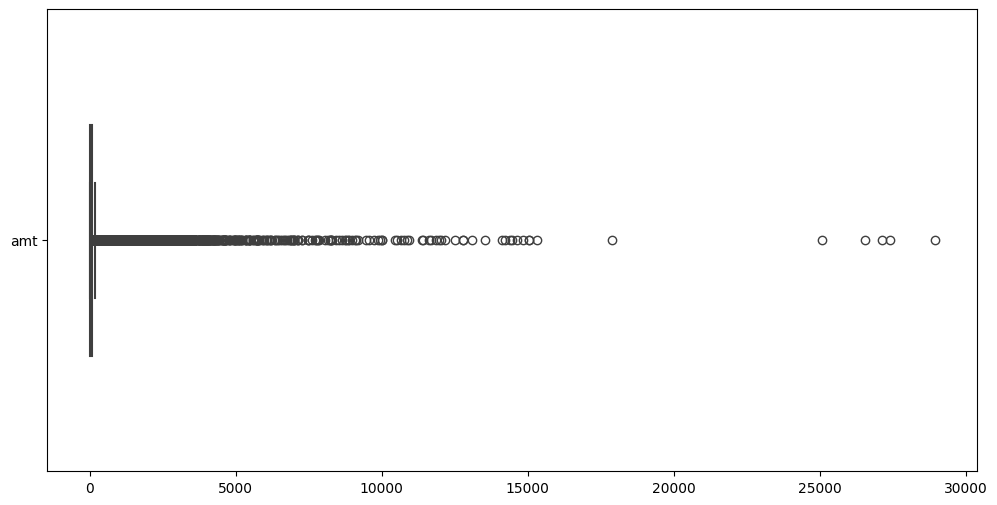

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(df[['amt']], orient='h', width=0.5, color='orange', linewidth=1.5)
plt.show()

In [24]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,city_pop,job,age,dis_to_merch,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",31,0.872830,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,41,0.272310,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,57,0.975845,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,52,0.919802,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,33,0.868505,0


# EDA
top merchants and categories with fraud

Used value_counts() and bar plots to identify high-fraud merchants.

Fraud timing patterns

Found the most common hour, day, and month for fraud cases.

Geographical fraud analysis

Analyzed top cities and states with the highest fraud count.

Comparison: Fraud vs Non-Fraud

Used grouped visualizations to compare behaviors between classes.



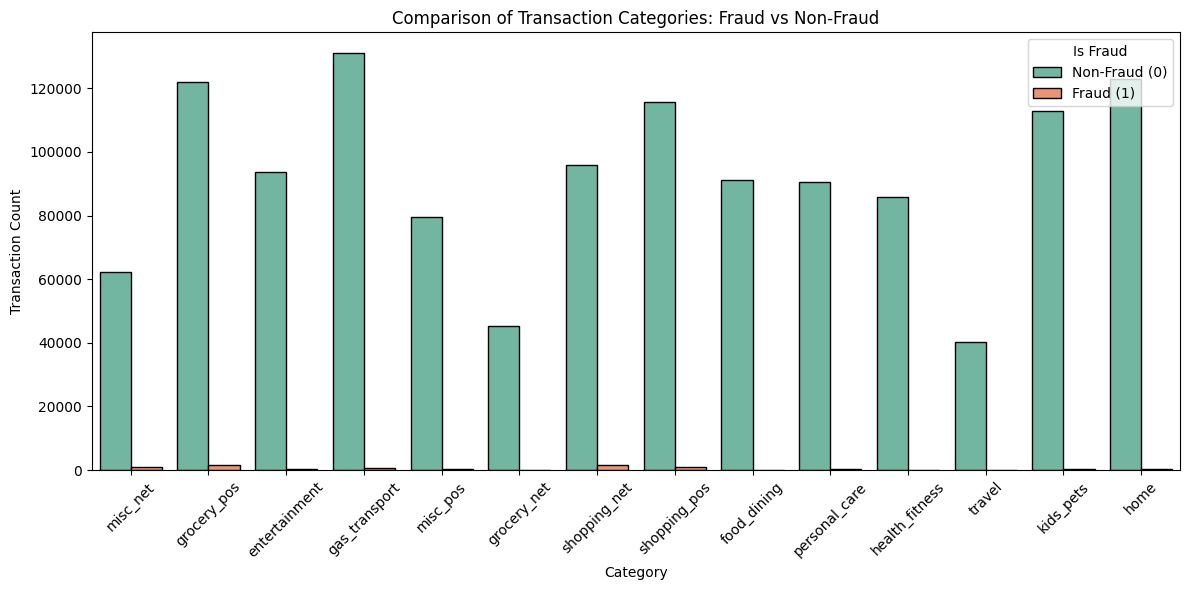

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', hue='is_fraud', palette='Set2', edgecolor='black')
plt.title('Comparison of Transaction Categories: Fraud vs Non-Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3379037945.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['is_fraud']==0], x='amt', label='Non-Fraud', shade=True)
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3379037945.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['is_fraud']==1], x='amt', label='Fraud', shade=True)


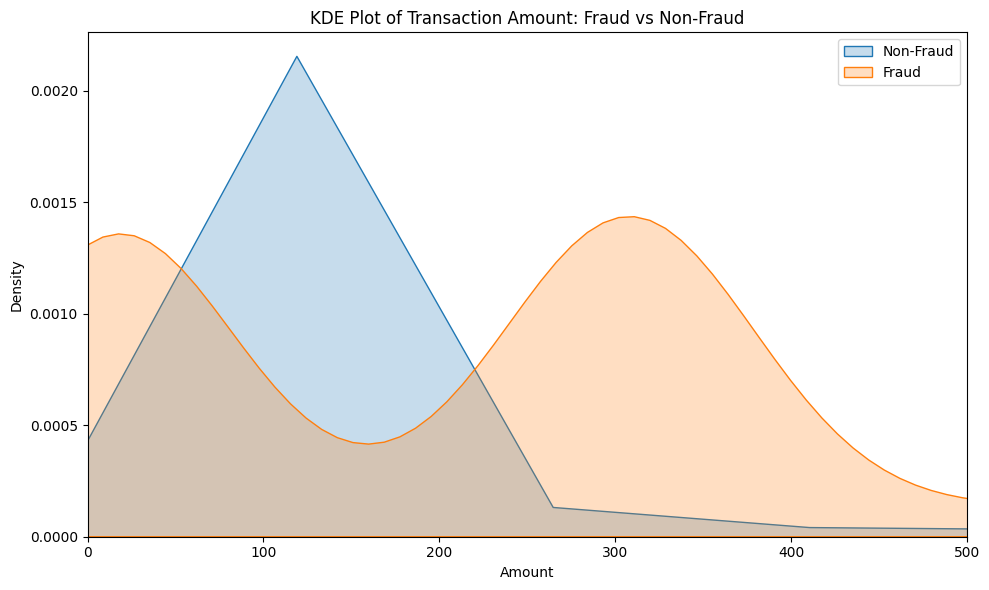

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['is_fraud']==0], x='amt', label='Non-Fraud', shade=True)
sns.kdeplot(data=df[df['is_fraud']==1], x='amt', label='Fraud', shade=True)
plt.title('KDE Plot of Transaction Amount: Fraud vs Non-Fraud')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 500)
plt.tight_layout()
plt.show()

In [27]:
fraud_trans=df[df['is_fraud']==1]
fraud_trans.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,city_pop,job,age,dis_to_merch,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,885,Soil scientist,31,0.699298,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,1595797,Horticultural consultant,59,0.781976,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,TX,1595797,Horticultural consultant,59,0.412627,1
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,NC,885,Soil scientist,31,0.374262,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,TX,1595797,Horticultural consultant,59,0.412760,1


In [28]:
fraud_trans['merchant'].value_counts().sort_values(ascending=False)

merchant
fraud_Rau and Sons                      49
fraud_Kozey-Boehm                       48
fraud_Cormier LLC                       48
fraud_Doyle Ltd                         47
fraud_Vandervort-Funk                   47
                                        ..
fraud_Kihn-Fritsch                       1
fraud_Ortiz Group                        1
fraud_Bednar Inc                         1
fraud_Stokes, Christiansen and Sipes     1
fraud_Hills-Olson                        1
Name: count, Length: 679, dtype: int64

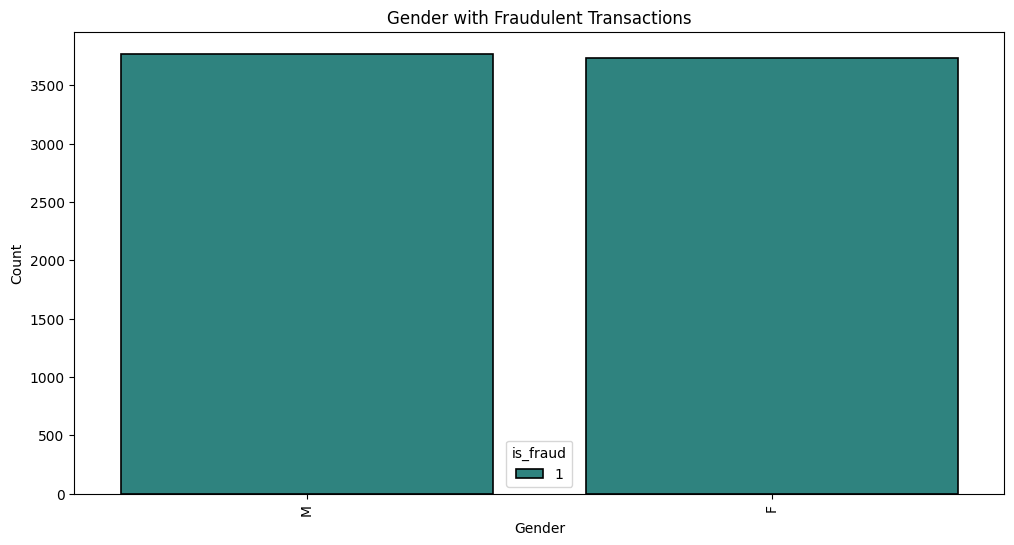

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='gender',hue='is_fraud',palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\1864220027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_trans, x='merchant', order=fraud_trans['merchant'].value_counts().index[:12], palette='viridis', edgecolor='black', linewidth=1.2)


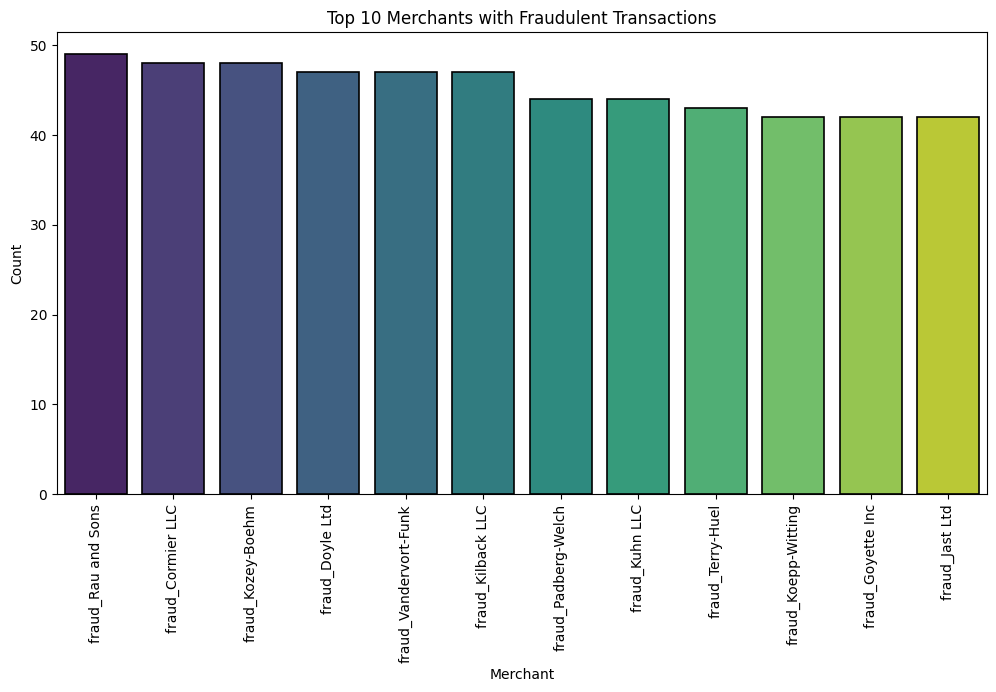

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans, x='merchant', order=fraud_trans['merchant'].value_counts().index[:12], palette='viridis', edgecolor='black', linewidth=1.2)
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.title('Top 10 Merchants with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

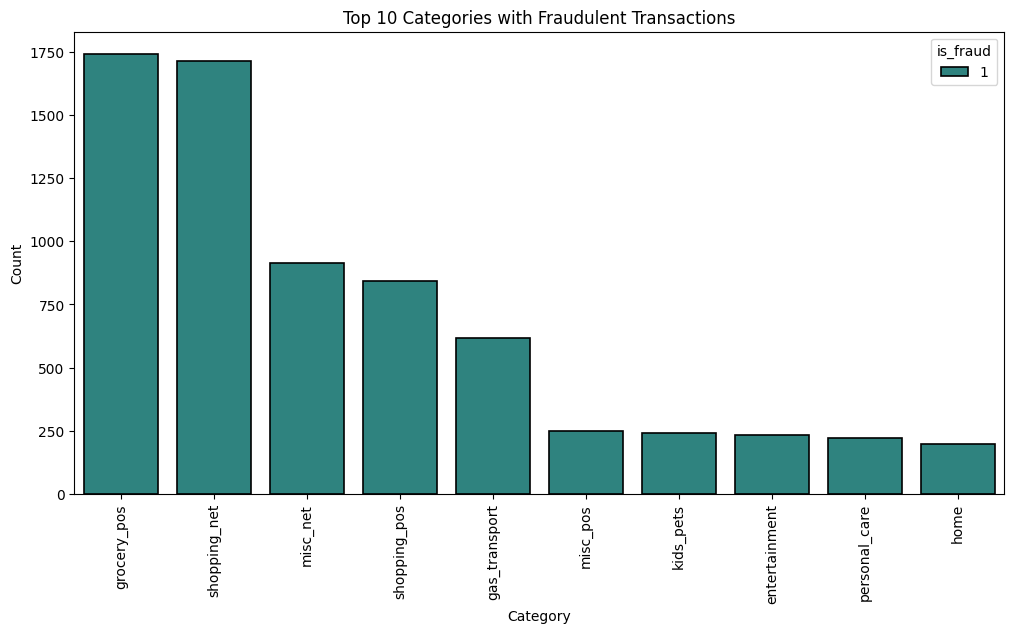

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='category',hue='is_fraud',order=fraud_trans['category'].value_counts().index[:10],palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

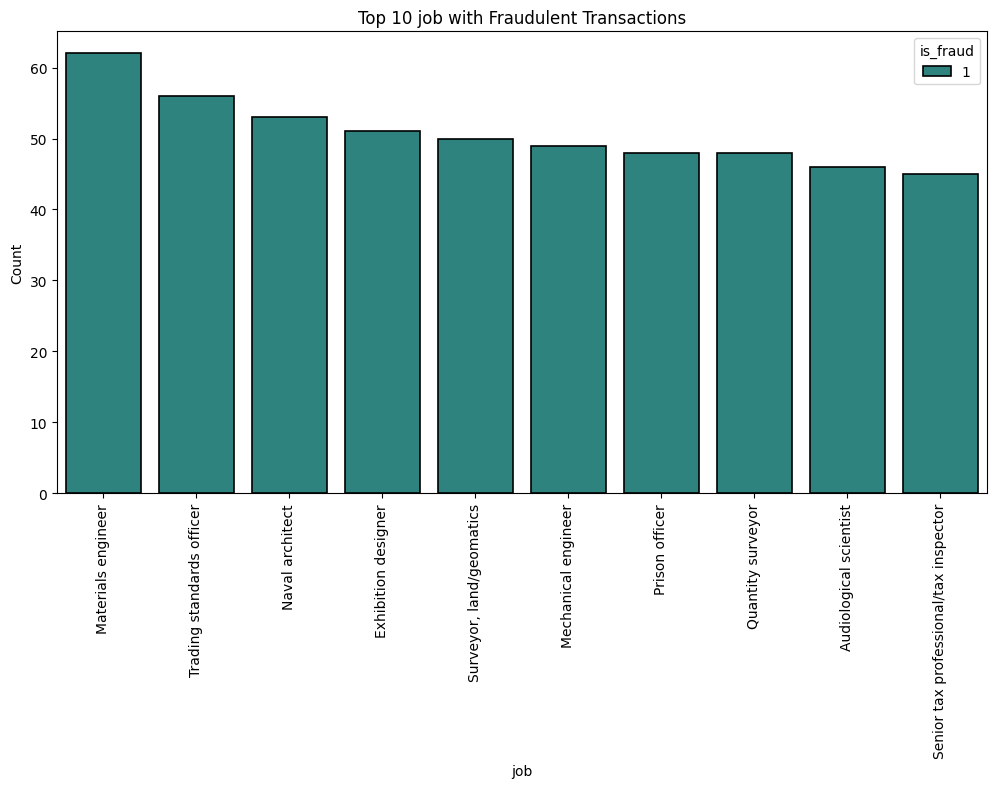

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='job',hue='is_fraud',order=fraud_trans['job'].value_counts().index[:10],palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Top 10 job with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3684623376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_fraud.values, y=top_jobs_fraud.index, palette='Reds_r')
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3684623376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_nonfraud.values, y=top_jobs_nonfraud.index, palette='Blues_r')


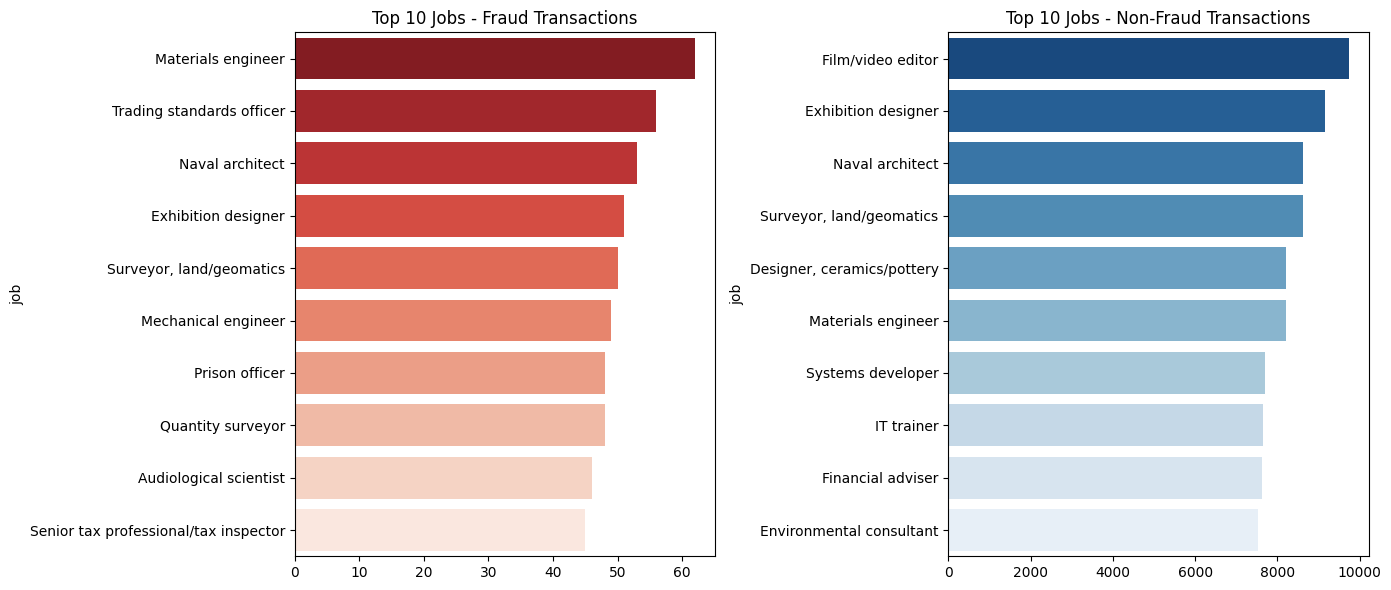

In [33]:
top_jobs_fraud = df[df['is_fraud']==1]['job'].value_counts().head(10)
top_jobs_nonfraud = df[df['is_fraud']==0]['job'].value_counts().head(10)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=top_jobs_fraud.values, y=top_jobs_fraud.index, palette='Reds_r')
plt.title('Top 10 Jobs - Fraud Transactions')
plt.subplot(1,2,2)
sns.barplot(x=top_jobs_nonfraud.values, y=top_jobs_nonfraud.index, palette='Blues_r')
plt.title('Top 10 Jobs - Non-Fraud Transactions')
plt.tight_layout()
plt.show()

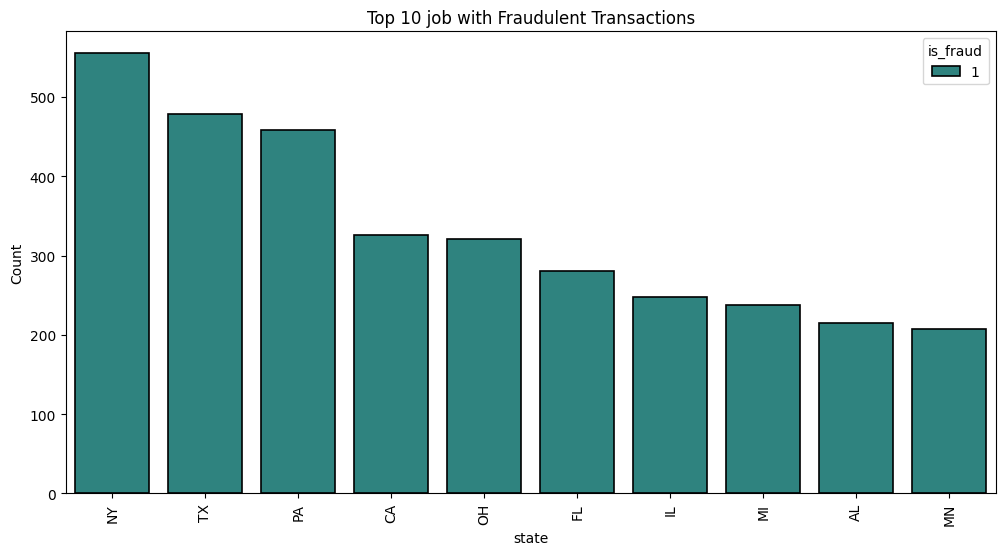

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='state',hue='is_fraud',order=fraud_trans['state'].value_counts().index[:10],palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('state')
plt.ylabel('Count')
plt.title('Top 10 job with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

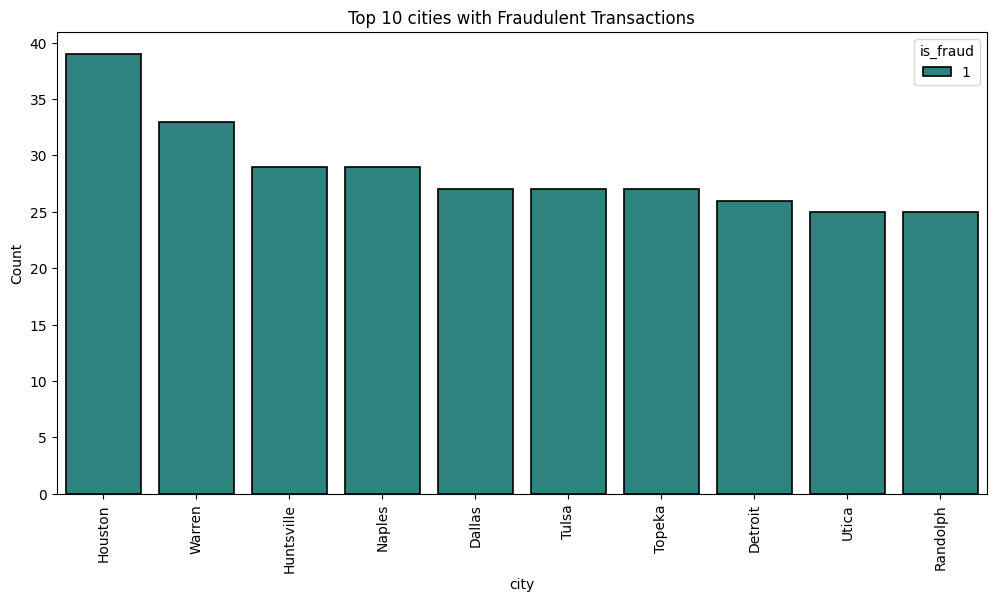

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='city',hue='is_fraud',order=fraud_trans['city'].value_counts().index[:10],palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('city')
plt.ylabel('Count')
plt.title('Top 10 cities with Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

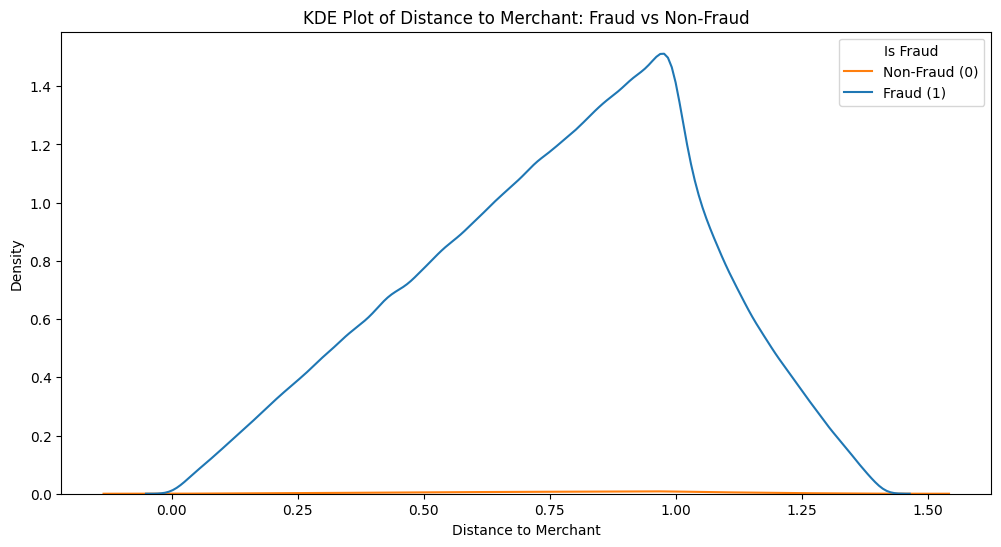

In [36]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='dis_to_merch', hue='is_fraud')
plt.title('KDE Plot of Distance to Merchant: Fraud vs Non-Fraud')
plt.xlabel('Distance to Merchant')
plt.ylabel('Density')
plt.legend(title='Is Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [37]:
fraud_trans['cc_num'].value_counts().nlargest(10)

cc_num
4593569795412          19
3520550088202337       19
4260128500325          18
4400011257587661852    16
3518669219150142       16
30074693890476         16
4629451965224809       16
6011366578560244       16
3556613125071656       16
4874006077381178       16
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '4593569795412'),
  Text(1, 0, '3520550088202337'),
  Text(2, 0, '4260128500325'),
  Text(3, 0, '4400011257587661852'),
  Text(4, 0, '3518669219150142'),
  Text(5, 0, '30074693890476'),
  Text(6, 0, '4629451965224809'),
  Text(7, 0, '6011366578560244'),
  Text(8, 0, '3556613125071656'),
  Text(9, 0, '4874006077381178')])

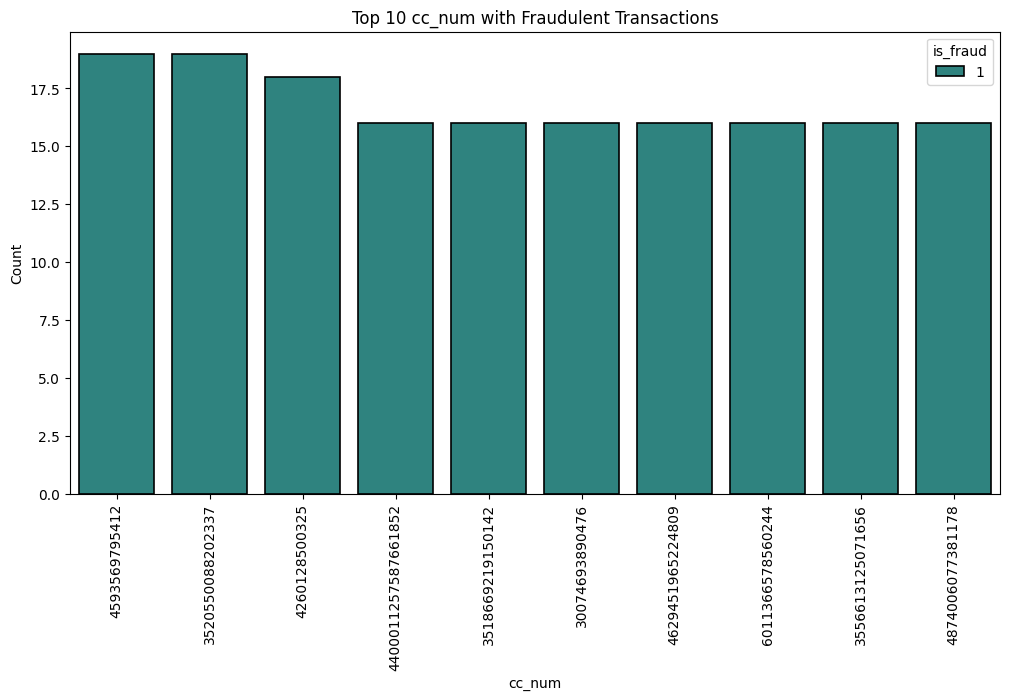

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='cc_num',hue='is_fraud',order=fraud_trans['cc_num'].value_counts().index[:10],palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('cc_num')
plt.ylabel('Count')
plt.title('Top 10 cc_num with Fraudulent Transactions')
plt.xticks(rotation=90)

In [39]:
fraud_trans['month']=fraud_trans['trans_date_trans_time'].dt.month
fraud_trans['day']=fraud_trans['trans_date_trans_time'].dt.day
fraud_trans['hour']=fraud_trans['trans_date_trans_time'].dt.hour

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3683277825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trans['month']=fraud_trans['trans_date_trans_time'].dt.month
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3683277825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trans['day']=fraud_trans['trans_date_trans_time'].dt.day
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3683277825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\931968416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_trans,x='month',palette='mako',edgecolor='black',linewidth=1.2)


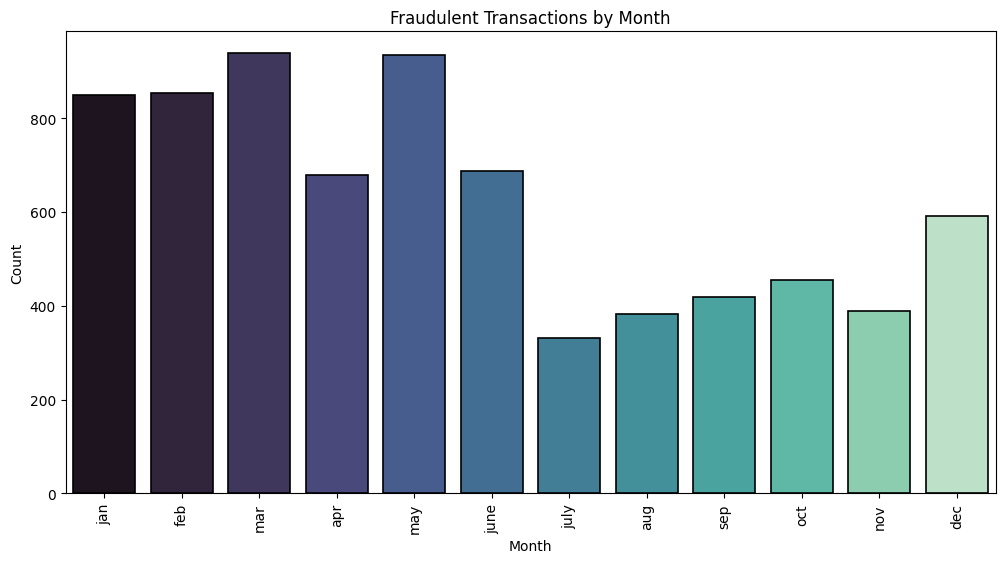

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='month',palette='mako',edgecolor='black',linewidth=1.2)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Month')
plt.xticks(rotation=90)
plt.xticks(ticks=range(0, 12), labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'])
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

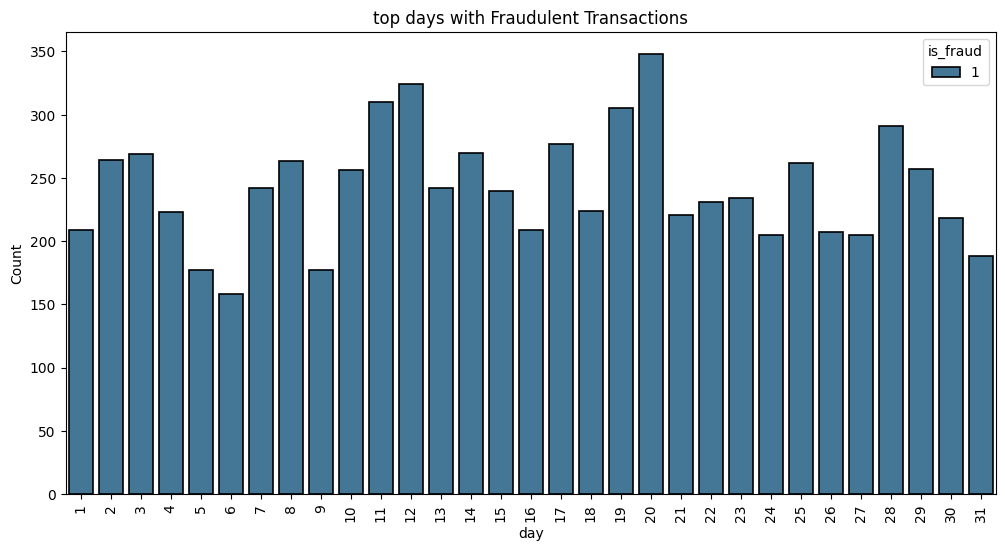

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='day',hue='is_fraud',palette='mako',edgecolor='black',linewidth=1.2)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('top days with Fraudulent Transactions')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

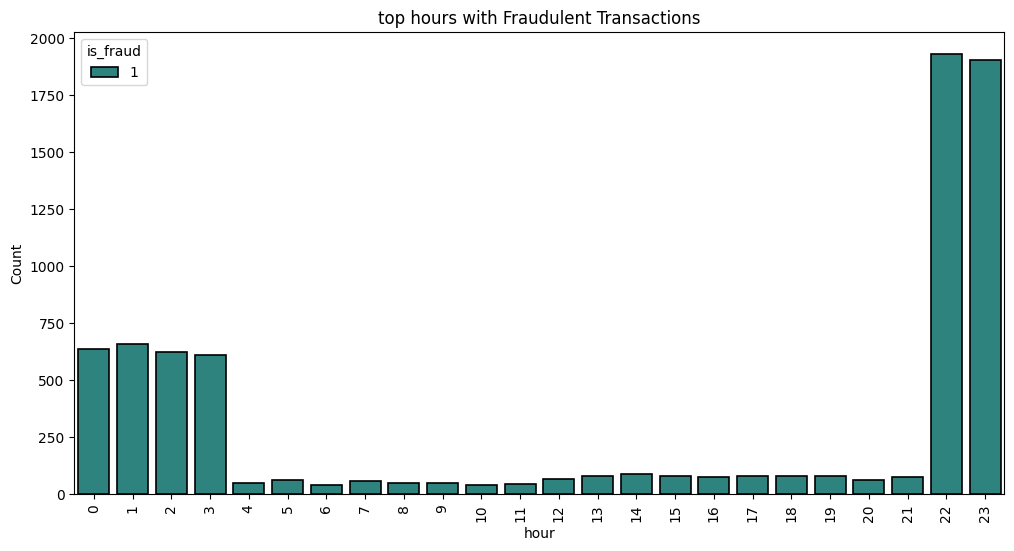

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data=fraud_trans,x='hour',hue='is_fraud',palette='viridis',edgecolor='black',linewidth=1.2)
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('top hours with Fraudulent Transactions')
plt.xticks(rotation=90)

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\305354442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trans['top_dates_have_fraud_trans']=fraud_trans['trans_date_trans_time'].dt.date


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2019-02-25'),
  Text(1, 0, '2019-02-28'),
  Text(2, 0, '2019-02-12'),
  Text(3, 0, '2019-05-20'),
  Text(4, 0, '2019-06-29'),
  Text(5, 0, '2019-09-11'),
  Text(6, 0, '2020-03-20'),
  Text(7, 0, '2019-12-23'),
  Text(8, 0, '2019-08-31'),
  Text(9, 0, '2020-06-18')])

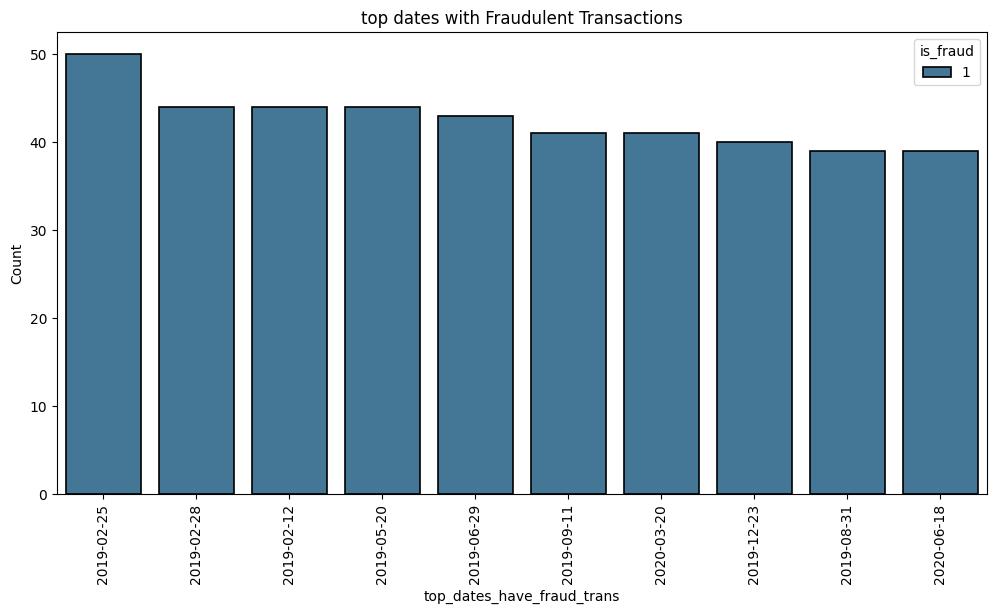

In [43]:
plt.figure(figsize=(12,6))
fraud_trans['top_dates_have_fraud_trans']=fraud_trans['trans_date_trans_time'].dt.date
sns.countplot(data=fraud_trans,x='top_dates_have_fraud_trans',hue='is_fraud',order=fraud_trans['top_dates_have_fraud_trans'].value_counts().index[:10],palette='mako',edgecolor='black',linewidth=1.2)
plt.xlabel('top_dates_have_fraud_trans')
plt.ylabel('Count')
plt.title('top dates with Fraudulent Transactions')
plt.xticks(rotation=90)

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3990926108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trans['date_only'] = fraud_trans['trans_date_trans_time'].dt.date
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3990926108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_trans, x='day', ax=axes[0, 0], palette='viridis')
C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3990926108.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

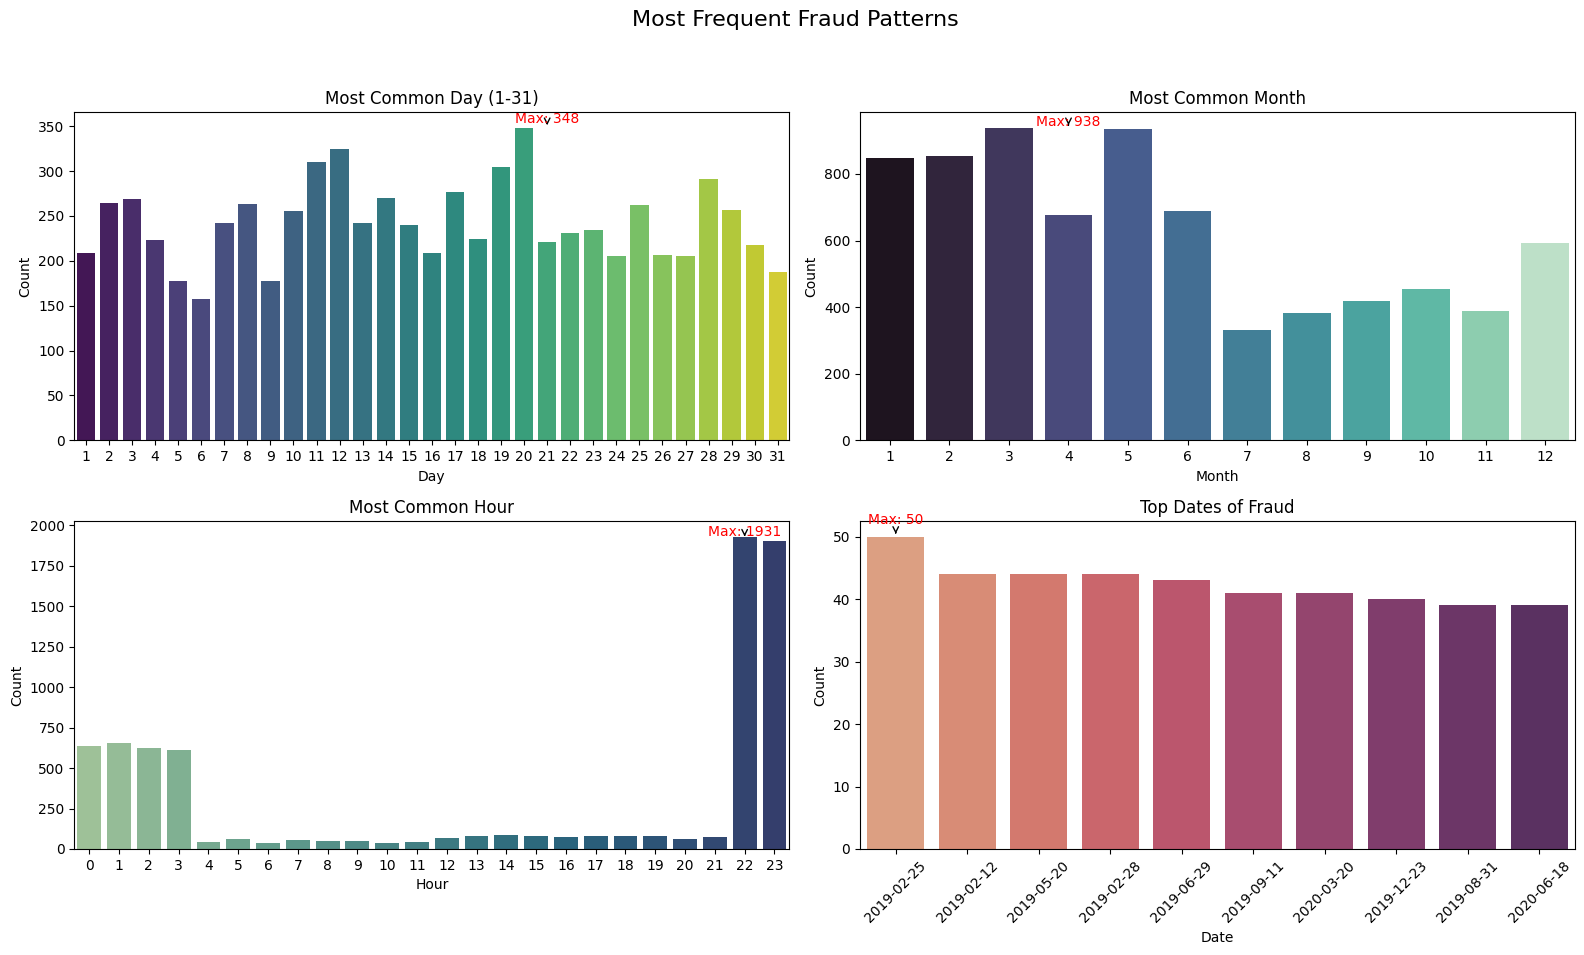

In [44]:
fraud_trans['date_only'] = fraud_trans['trans_date_trans_time'].dt.date
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Most Frequent Fraud Patterns', fontsize=16)
sns.countplot(data=fraud_trans, x='day', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Most Common Day (1-31)')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Count')
day_counts = fraud_trans['day'].value_counts().sort_index()
max_day = day_counts.idxmax()
max_count = day_counts.max()
axes[0, 0].annotate(f'Max: {max_count}', xy=(max_day, max_count), xytext=(max_day, max_count + 5),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center', color='red')
sns.countplot(data=fraud_trans, x='month', ax=axes[0, 1], palette='mako')
axes[0, 1].set_title('Most Common Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Count')
month_counts = fraud_trans['month'].value_counts().sort_index()
max_month = month_counts.idxmax()
max_count = month_counts.max()
axes[0, 1].annotate(f'Max: {max_count}', xy=(max_month, max_count), xytext=(max_month, max_count + 5),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center', color='red')
sns.countplot(data=fraud_trans, x='hour', ax=axes[1, 0], palette='crest')
axes[1, 0].set_title('Most Common Hour')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Count')
hour_counts = fraud_trans['hour'].value_counts().sort_index()
max_hour = hour_counts.idxmax()
max_count = hour_counts.max()
axes[1, 0].annotate(f'Max: {max_count}', xy=(max_hour, max_count), xytext=(max_hour, max_count + 5),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center', color='red')
top_dates = fraud_trans['date_only'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_dates.index.astype(str), y=top_dates.values, ax=axes[1, 1], palette='flare')
axes[1, 1].set_title('Top Dates of Fraud')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
max_date = top_dates.index[0]
max_date_count = top_dates.values[0]
axes[1, 1].annotate(f'Max: {max_date_count}', xy=(0, max_date_count), xytext=(0, max_date_count + 2),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center', color='red')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [45]:
pd.pivot_table(df,
               index='gender',
               columns='category',
               values='is_fraud',
               aggfunc='mean',
               fill_value=0)


category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
gender,,,,,,,,,,,,,,
F,0.003030,0.002397,0.003509,0.002255,0.011481,0.002475,0.002757,0.003022,0.010999,0.003894,0.002933,0.012397,0.006737,0.003280
M,0.001899,0.000813,0.006153,0.003816,0.017037,0.000517,0.000311,0.000977,0.018916,0.002280,0.001632,0.024332,0.007903,0.002453


In [46]:
df['age_group']=pd.cut(df['age'],bins=[0,16,21,60,100],
                       labels=['baby','teen','adult','old'])

In [47]:
age_dis=pd.pivot_table(df,
               index='age_group',
               columns='category',
               values='is_fraud',
               aggfunc='mean',
               fill_value=0)
age_dis

C:\Users\TM\AppData\Local\Temp\ipykernel_8088\3776183013.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_dis=pd.pivot_table(df,


category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
age_group,,,,,,,,,,,,,,
baby,0.000000,0.000856,0.003924,0.001495,0.026804,0.001104,0.003610,0.002430,0.010217,0.002257,0.002176,0.016546,0.005709,0.000000
teen,0.000763,0.000000,0.004338,0.002671,0.027982,0.000299,0.000459,0.001222,0.015287,0.001611,0.000961,0.021904,0.009073,0.002772
adult,0.002528,0.001933,0.004607,0.002235,0.012098,0.001879,0.001984,0.002403,0.012359,0.003027,0.002684,0.015384,0.006178,0.003099
old,0.002787,0.000944,0.005032,0.012346,0.020197,0.000619,0.000239,0.001245,0.021550,0.004083,0.001798,0.025683,0.011400,0.002308


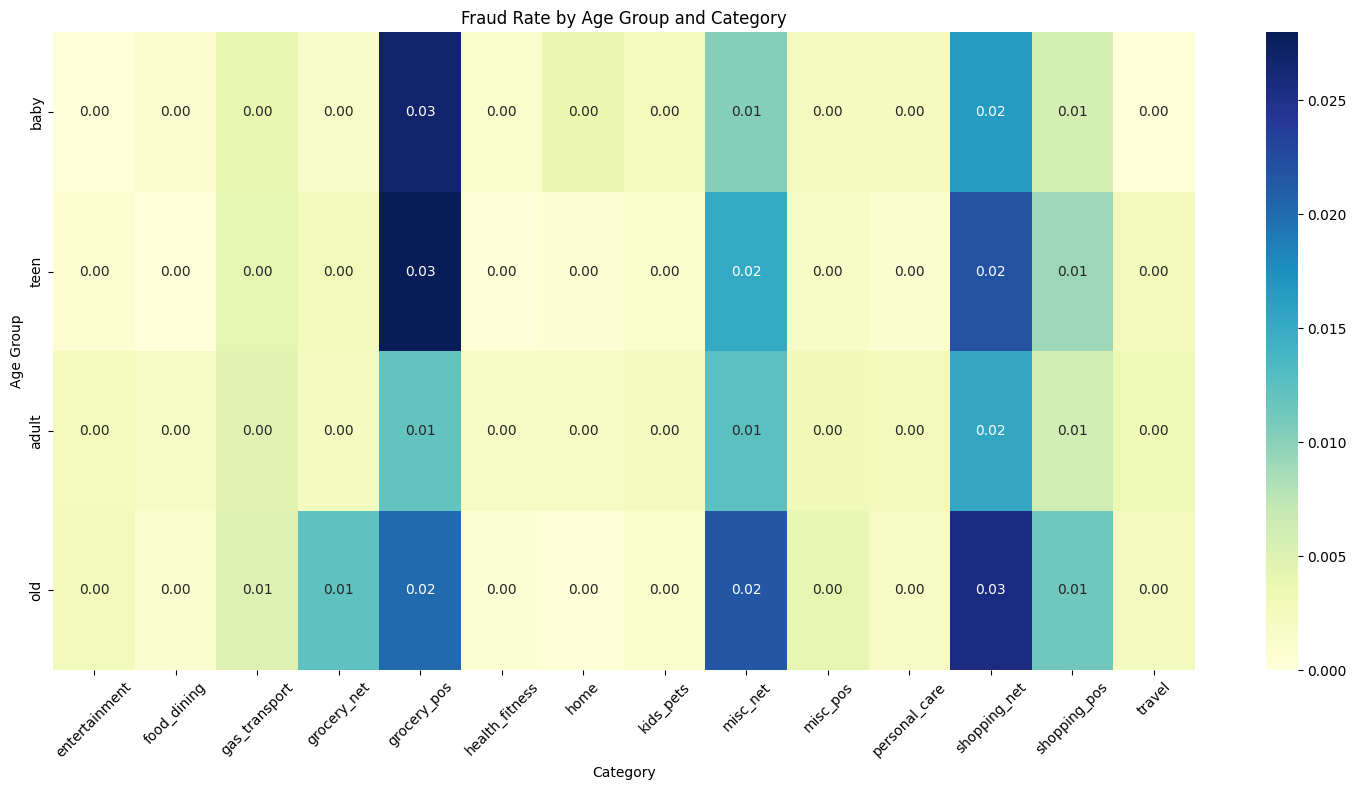

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(age_dis, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Fraud Rate by Age Group and Category")
plt.ylabel("Age Group")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


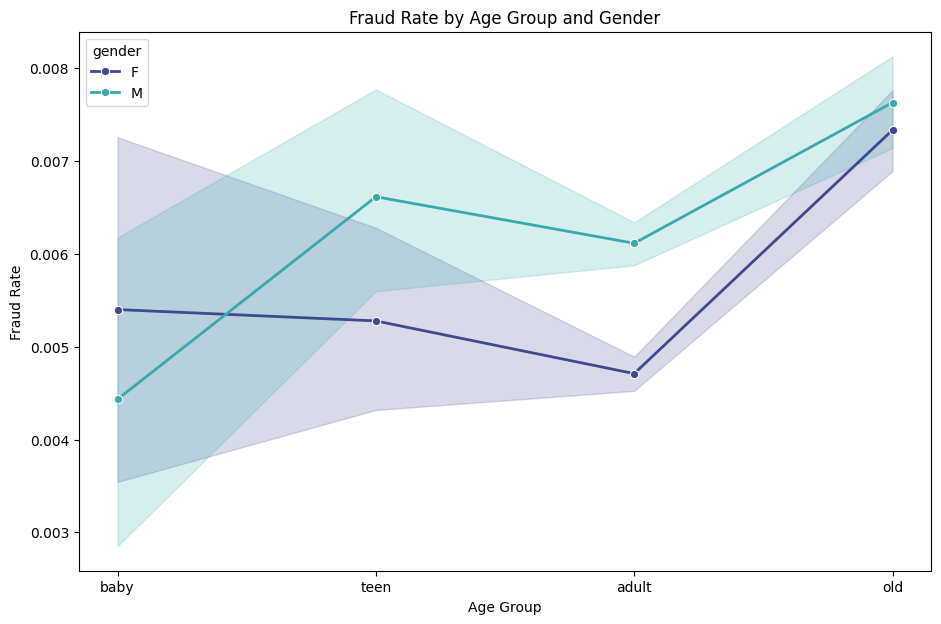

In [49]:
plt.figure(figsize=(11,7))
sns.lineplot(data=df,x='age_group',y='is_fraud',hue='gender',palette='mako',marker='o',linewidth=2)
plt.title('Fraud Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.show()

# FEATURE ENG

Remove irrelevant columns

Dropped columns that are not useful or contain too much noise.

Select important features

Used SelectKBest to choose the most relevant features for prediction.

Encode categorical variables

Applied LabelEncoder to transform category, gender, age_group, etc.

Handle class imbalance

Used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.



In [50]:
df.drop(columns=['age'],inplace=True)
df=df[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender','age_group','city', 'state', 'city_pop', 'job', 'dis_to_merch',
       'is_fraud' ]]
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,age_group,city,state,city_pop,job,dis_to_merch,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,adult,Moravian Falls,NC,3495,"Psychologist, counselling",0.872830,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,adult,Orient,WA,149,Special educational needs teacher,0.272310,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,adult,Malad City,ID,4154,Nature conservation officer,0.975845,0


In [51]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [52]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['merchant', 'category', 'gender', 'age_group']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df = df.drop(['trans_date_trans_time', 'cc_num', 'city', 'state', 'job'], axis=1)

In [53]:
df=df[['merchant', 'category', 'amt', 'gender', 'age_group', 'city_pop',
       'dis_to_merch','hour', 'dayofweek', 'month', 'is_fraud']]

In [54]:
df.head(3)

,merchant,category,amt,gender,age_group,city_pop,dis_to_merch,hour,dayofweek,month,is_fraud
0,514,8,4.97,0,0,3495,0.872830,0,1,1,0
1,241,4,107.23,0,0,149,0.272310,0,1,1,0
2,390,0,220.11,1,0,4154,0.975845,0,1,1,0


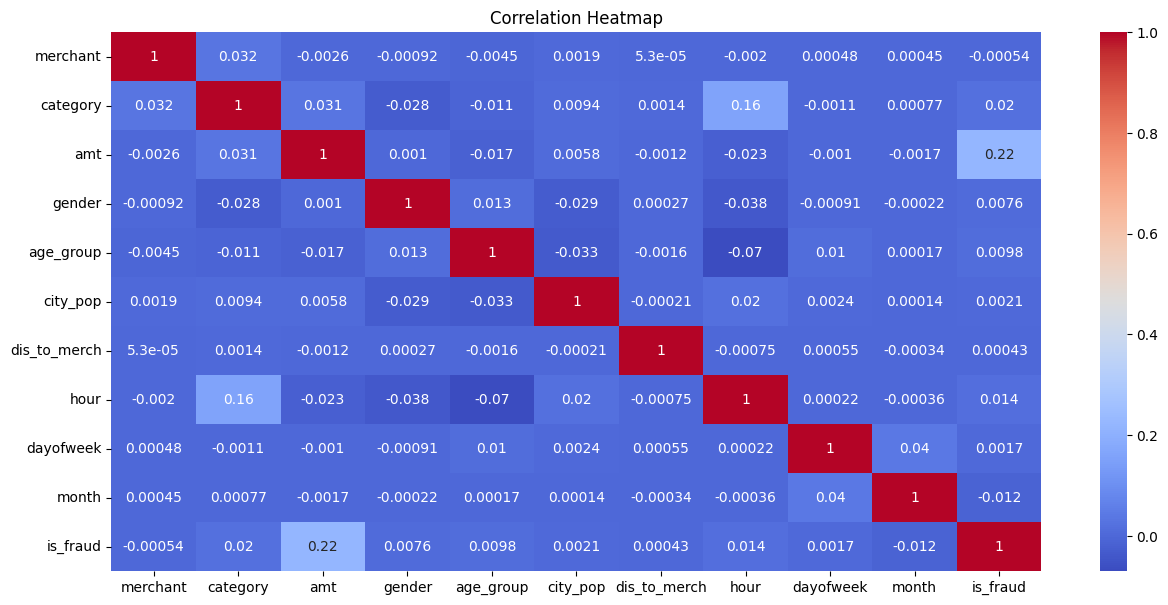

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [56]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(X, y)
print("Selected Features:")
selected_cols = X.columns[fit.support_]
print(selected_cols)
X_selected = X[selected_cols]

Selected Features:
Index(['merchant', 'category', 'amt', 'age_group', 'city_pop', 'dis_to_merch',
       'hour', 'month'],
      dtype='object')


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['amt']=sc.fit_transform(df[['amt']])
df['city_pop']=sc.fit_transform(df[['city_pop']])
df.head(2)

,merchant,category,amt,gender,age_group,city_pop,dis_to_merch,hour,dayofweek,month,is_fraud
0,514,8,-0.407826,0,0,-0.282589,0.87283,0,1,1,0
1,241,4,0.230039,0,0,-0.293670,0.27231,0,1,1,0


In [58]:
new_df=df.copy()
new_df=new_df[['category' ,'amt', 'gender', 'age_group', 'city_pop', 'hour',
       'dayofweek','dis_to_merch', 'month','merchant','is_fraud']]

### Modeling

Split the dataset

Separated features and target (X and y).

Split into training, validation, and testing sets.

Train multiple models

Applied: RandomForestClassifier and LightGBM.

Tune model hyperparameters

Used GridSearchCV or RandomizedSearchCV to find the best settings.

Evaluate model performance

Compared models using: precision, recall, f1-score, and confusion matrix.

Ensemble learning (VotingClassifier)

Combined best-performing models for more robust predictions.



In [59]:
new_df

,category,amt,gender,age_group,city_pop,hour,dayofweek,dis_to_merch,month,merchant,is_fraud
0,8,-0.407826,0,0,-0.282589,0,1,0.872830,1,514,0
1,4,0.230039,0,0,-0.293670,0,1,0.272310,1,241,0
2,0,0.934149,1,0,-0.280406,0,1,0.975845,1,390,0
3,2,-0.158132,1,0,-0.287742,0,1,0.919802,1,360,0
4,9,-0.177094,1,0,-0.293835,0,1,0.868505,1,297,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,-0.341769,1,0,-0.293309,12,6,1.177732,6,499,0
1296671,1,-0.116339,1,0,-0.293832,12,6,0.819632,6,2,0
1296672,1,0.221930,1,0,-0.291186,12,6,0.967541,6,599,0
1296673,1,0.028375,1,0,-0.290434,12,6,0.898775,6,509,0


In [60]:
    X=new_df.drop(columns=['is_fraud','merchant','gender','dis_to_merch','dayofweek','month'])
    y=new_df['is_fraud']

In [136]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

D:\SETUP FILES\anaconda\envs\tf_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)
print("Best Parameters:", rf_grid.best_params_)
print("Random Forest Classification Report:")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:


NameError: name 'classification_report' is not defined

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.40      0.88      0.55      1501

    accuracy                           0.99    259335
   macro avg       0.70      0.94      0.77    259335
weighted avg       1.00      0.99      0.99    259335



In [66]:
from lightgbm import LGBMClassifier
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, -1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
lgbm = LGBMClassifier()
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           scoring='recall', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[LightGBM] [Info] Number of positive: 4804, number of negative: 825068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 829872, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146017
[LightGBM] [Info] Start training from score -5.146017
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.77      0.69      0.73      1501

    accuracy                           1.00    259335
   macro avg       0.89

In [67]:
from sklearn.ensemble import VotingClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

In [68]:
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lgbm', lgbm)],
    voting='soft'
)
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4804, number of negative: 825068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 829872, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146017
[LightGBM] [Info] Start training from score -5.146017


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lgbm', LGBMClassifier(random_state=42))],
                 voting='soft')

In [69]:
y_pred = ensemble.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, y_pred))


Voting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.87      0.72      0.79      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.86      0.89    259335
weighted avg       1.00      1.00      1.00    259335



In [138]:
import tensorflow as tf
import keras

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history_DNN = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50
51567/51567 [==============================] - 279s 5ms/step - loss: 0.1782 - accuracy: 0.9304 - val_loss: 0.1263 - val_accuracy: 0.9419
Epoch 2/50
51567/51567 [==============================] - 280s 5ms/step - loss: 0.1490 - accuracy: 0.9420 - val_loss: 0.1325 - val_accuracy: 0.9487
Epoch 3/50
51567/51567 [==============================] - 282s 5ms/step - loss: 0.1432 - accuracy: 0.9446 - val_loss: 0.1122 - val_accuracy: 0.9665
Epoch 4/50
51567/51567 [==============================] - 253s 5ms/step - loss: 0.1402 - accuracy: 0.9456 - val_loss: 0.1372 - val_accuracy: 0.9468
Epoch 5/50
51567/51567 [==============================] - 271s 5ms/step - loss: 0.1391 - accuracy: 0.9459 - val_loss: 0.1142 - val_accuracy: 0.9621
Epoch 6/50
51567/51567 [==============================] - 275s 5ms/step - loss: 0.1377 - accuracy: 0.9465 - val_loss: 0.1164 - val_accuracy: 0.9604
Epoch 7/50
51567/51567 [==============================] - 263s 5ms/step - loss: 0.1386 - accuracy: 0.9464 - val_

In [147]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               768       
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
keras_model.save('keras_model.model')

INFO:tensorflow:Assets written to: keras_model.model\assets


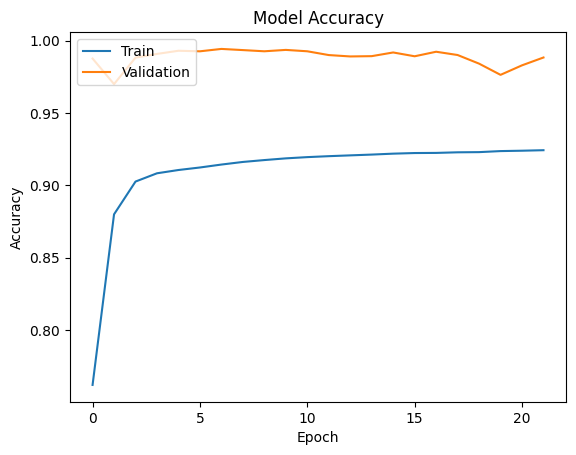

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

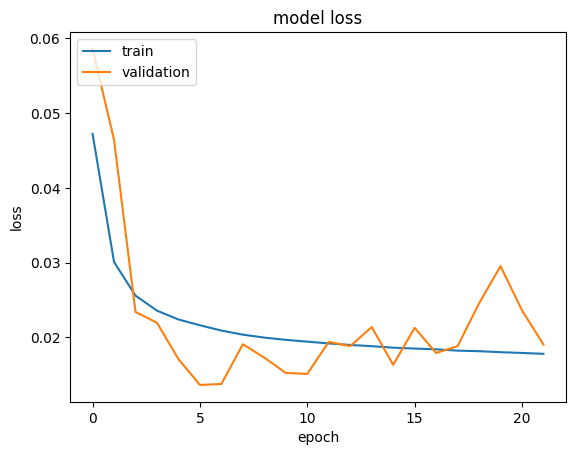

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [155]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.85).astype("int")
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred)
print('classifCTION REPORT:\n,',class_report)

8105/8105 [==============================] - 10s 1ms/step
classifCTION REPORT:
,               precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.45      0.85      0.59      1501

    accuracy                           0.99    259335
   macro avg       0.73      0.92      0.79    259335
weighted avg       1.00      0.99      0.99    259335



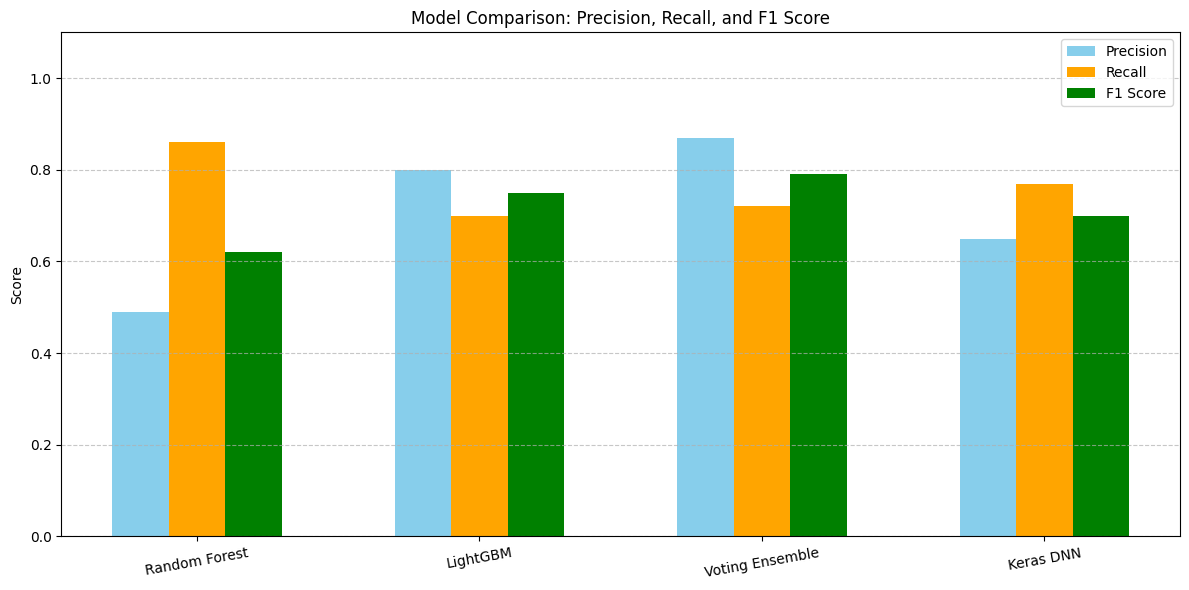

In [123]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'LightGBM', 'Voting Ensemble', 'Keras DNN']
precision_scores = [0.49, 0.80, 0.87, 0.65]
recall_scores = [0.86, 0.70, 0.72, 0.77]
f1_scores = [0.55, 0.73, 0.80, 0.70]

x = np.arange(len(models)) 
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision_scores, width, label='Precision', color='skyblue')
plt.bar(x, recall_scores, width, label='Recall', color='orange')
plt.bar(x + width, f1_scores, width, label='F1 Score', color='green')

plt.ylabel('Score')
plt.title('Model Comparison: Precision, Recall, and F1 Score')
plt.xticks(x, models, rotation=10)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
